In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


11490434/11490434 [==============================] - 0s 0us/step


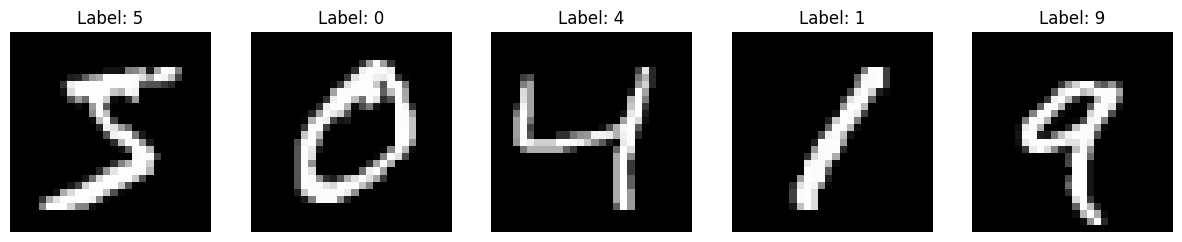

In [3]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
# Normalize pixel values between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data to include a channel dimension (for Conv2D input)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)  # 10 classes (digits 0 through 9)
y_test = to_categorical(y_test, 10)

# Display the first few images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(X_train[i, :, :, 0], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Label: {np.argmax(y_train[i])}')
plt.show()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add Convolutional layers with ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the 2D feature maps to a vector
model.add(Flatten())

# Add Dense (fully connected) layers with ReLU activation
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer with softmax activation for multi-class classification
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)         0

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 58s 30ms/step - loss: 0.1967 - accuracy: 0.9383 - val_loss: 0.0714 - val_accuracy: 0.9791
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0646 - accuracy: 0.9806 - val_loss: 0.0689 - val_accuracy: 0.9799
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0472 - accuracy: 0.9854 - val_loss: 0.0556 - val_accuracy: 0.9832
Epoch 4/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0381 - accuracy: 0.9884 - val_loss: 0.0500 - val_accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0308 - accuracy: 0.9907 - val_loss: 0.0474 - val_accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0555 - val_accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.0508 -

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


313/313 [==============================] - 4s 13ms/step - loss: 0.0463 - accuracy: 0.9878
Test Loss: 0.0463
Test Accuracy: 0.9878
